In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/maengjuseog/Desktop/3-2/DeepLearningClass/Data/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


데이터 분석 및 데이터 전처리(data preprocessing)
데이터 특성(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI)열을 살펴보면

0이 존재 하는 걸 알 수 있는데 Pregnancies(임신횟수) 는 0이 이상치 또는 결측치가 될 수는 없다

하지만 혈당(Glucose), 혈압(BloodPressure) , 피부두께(SkinThickness), 인슐린 수치(Insulin), BMI 지수(BMI) 는 생리학적으로 불가능한 수치 이므로 이상치라 판단 할 수 있다.

따라서 0인 값이 있는 행은 제거 또는 0값 대신 그 특성에 대한 평균치로 대체한다.

샘플이 768개로 적기 때문에 관련 행을 삭제하는 것은 데이터의 양이 작아지므로 평균값으로 대채

In [4]:
input = data.drop('Outcome',axis=1)
target = data['Outcome']

input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 0 값을 해당 열의 평균값으로 대체하는 코드
for column in columns_to_replace:
    # 열의 평균값 계산 (0을 제외하고 계산)
    mean_value = input[input[column] != 0][column].mean()

    # 0 값을 평균값으로 대체
    input[column] = input[column].replace(0, mean_value)

# 결과 확인
print(input[columns_to_replace].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.435949      12.096346       8.790942   85.021108    6.875151
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.202592      29.153420  155.548223   32.400000
75%    140.250000      80.000000      32.000000  155.548223   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [6]:
input

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train, test 분리
train_input,test_input, train_target, test_target = train_test_split(input, target, test_size=0.2)

# StandardScaler() 로 데이터들을 -1~+1 사이로 맞춰주기
# train data set에 대해 표준화를 수행하고, test data는 train data에 맞게 변환 되어야한다.
ss = StandardScaler()
train_input_scaled = ss.fit_transform(train_input)
test_input_scaled = ss.transform(test_input)

# 결과 확인
print(train_input_scaled[:5])
print(test_input_scaled[:5])
print(train_input_scaled.shape)

[[ 0.03920491 -1.1922171  -1.1919152  -0.79692496 -1.23633668 -0.67600051
  -0.49785371 -0.43857609]
 [-0.86348815 -1.32153379  0.15722239  1.36414492 -1.14378234  2.03939756
   2.00480369 -0.09931849]
 [-0.56259047 -0.48097528  0.15722239  0.1129992  -0.64630277  0.17531348
  -0.18739747 -0.86264808]
 [-1.16438584  1.84672522  1.50635997 -0.22822236 -0.00364913  1.71648536
   0.70595618 -0.86264808]
 [ 1.24279566 -0.31932941 -0.01141981  0.0167087  -0.00364913 -1.29246927
   1.19381597  2.10585589]]
[[-5.62590466e-01 -1.12755875e+00 -1.19191520e+00 -1.47936809e+00
  -1.20162881e+00  4.32130299e-02 -9.41362614e-01 -6.93019285e-01]
 [-1.16438584e+00  1.87905439e+00  4.94506782e-01  3.86643636e+00
  -1.64126192e+00  3.96219295e+00  6.19913076e+00 -6.93019285e-01]
 [-2.61692778e-01 -5.13304455e-01 -1.14198132e-02  1.67087014e-02
  -3.64913147e-03 -9.69557063e-01 -8.11477863e-01 -5.23390487e-01]
 [ 2.74728411e+00 -5.77962802e-01 -1.14198132e-02  1.67087014e-02
  -3.64913147e-03 -1.76954382

In [8]:
train_target.shape

(614,)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# 이진 분류 모델이므로 손실함수는 binary_crossentropy 사용
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_input_scaled,train_target, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6635 - loss: 0.6619 - val_accuracy: 0.6935 - val_loss: 0.6358
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7089 - loss: 0.6135 - val_accuracy: 0.7581 - val_loss: 0.5836
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7088 - loss: 0.5816 - val_accuracy: 0.8226 - val_loss: 0.5161
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7241 - loss: 0.5453 - val_accuracy: 0.8226 - val_loss: 0.4613
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7684 - loss: 0.4867 - val_accuracy: 0.8387 - val_loss: 0.4268
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.4643 - val_accuracy: 0.8387 - val_loss: 0.4049
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4465 - val_accuracy: 0.8065 - val_loss: 0.4043
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.4778 - val_accuracy: 0.8226 - v

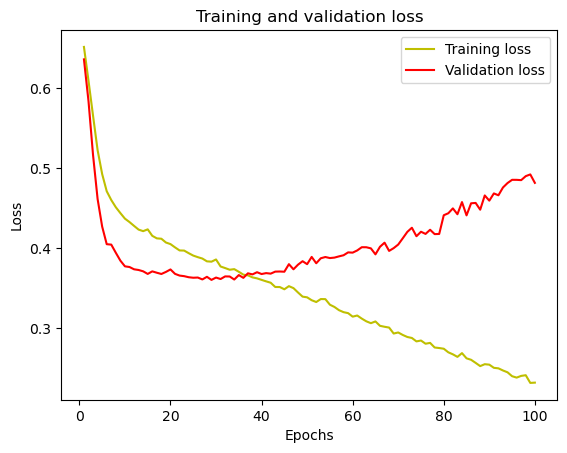

In [11]:
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

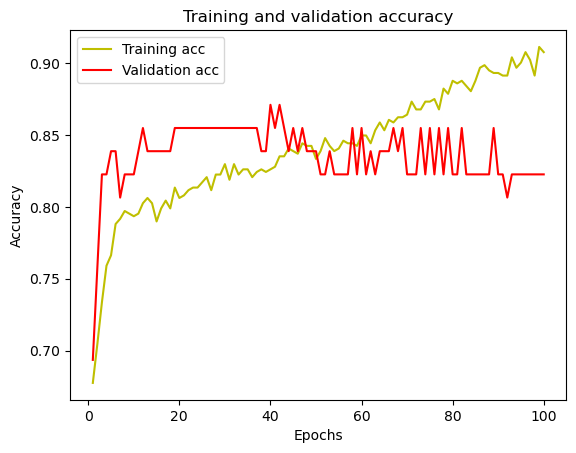

In [12]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.evaluate(test_input_scaled,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.7216 - loss: 0.7109


[0.7357015013694763, 0.7077922224998474]

In [14]:
from keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
history2 = model.fit(train_input_scaled,train_target, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5383 - loss: 0.6922 - val_accuracy: 0.7097 - val_loss: 0.6372
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6561 - loss: 0.6441 - val_accuracy: 0.7742 - val_loss: 0.5806
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7522 - loss: 0.5788 - val_accuracy: 0.8387 - val_loss: 0.5213
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6800 - loss: 0.5951 - val_accuracy: 0.8387 - val_loss: 0.4807
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7410 - loss: 0.5346 - val_accuracy: 0.8548 - val_loss: 0.4480
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7391 - loss: 0.4976 - val_accuracy: 0.8226 - val_loss: 0.4249
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7202 - loss: 0.5317 - val_accuracy: 0.8548 - val_loss: 0.4176
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7581 - loss: 0.4978 - val_accuracy: 0.8548 - v

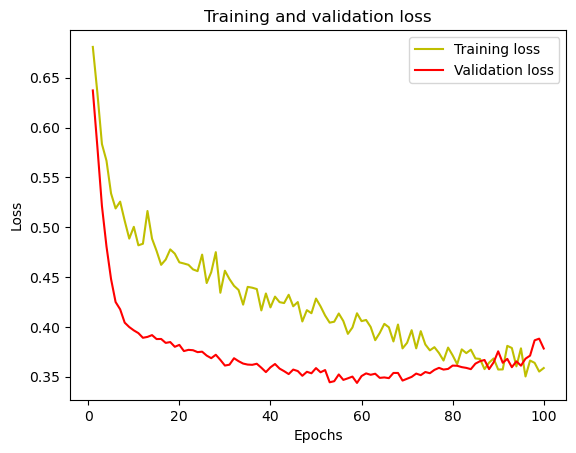

In [17]:
loss =history2.history['loss']
val_loss =history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

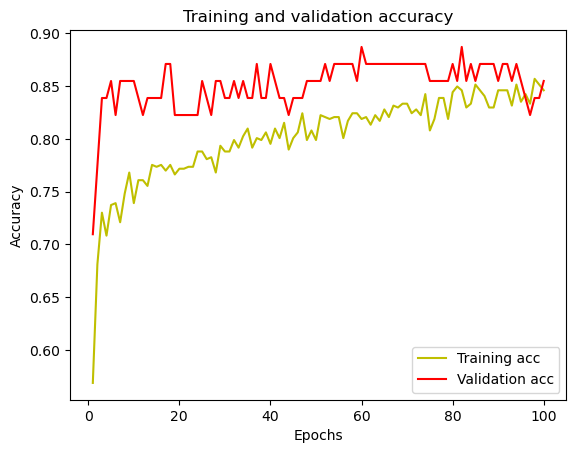

In [18]:
acc =history2.history['accuracy']
val_acc =history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
model.evaluate(test_input_scaled,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7546 - loss: 0.5831


[0.6046475768089294, 0.7272727489471436]

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(test_input_scaled)

print(classification_report(test_target,pred.round()))
print(confusion_matrix(test_target,pred.round()))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       103
           1       0.58      0.65      0.61        51

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.74      0.73      0.73       154

[[79 24]
 [18 33]]


In [21]:
from sklearn.decomposition import PCA

# 2. PCA 적용 (train 데이터로만 fit, 주성분 2개)
pca = PCA(n_components=2)
train_input_pca = pca.fit_transform(train_input_scaled)

# 3. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)
# 4. 결과 확인
print("주성분 분석 결과 (PC1, PC2):\n", train_input_pca[:5])

# 각 주성분이 설명하는 분산 비율
print("설명된 분산 비율:", pca.explained_variance_ratio_)

주성분 분석 결과 (PC1, PC2):
 [[-2.15293473 -0.69194787]
 [ 0.35151129  2.11066037]
 [-0.79702676  0.62574943]
 [ 1.29285456  1.96366732]
 [ 0.75853439 -1.96671088]]
설명된 분산 비율: [0.28766119 0.179836  ]


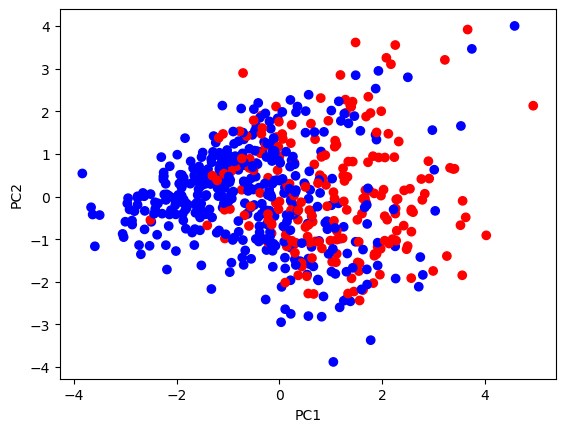

In [22]:
plt.scatter(train_input_pca[:,0],train_input_pca[:,1],c=train_target,cmap='bwr')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [23]:
def model_fn(input_shape):
    model = Sequential()
    model.add(Dense(16,input_shape=input_shape,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [24]:
model_pca2 = model_fn((2,))
model_pca2.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_pca2.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,137 (4.44 KB)

 Trainable params: 1,137 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
pca2_history = model_pca2.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3699 - loss: 0.7179 - val_accuracy: 0.5260 - val_loss: 0.6903
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6363 - loss: 0.6807 - val_accuracy: 0.6818 - val_loss: 0.6708
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7469 - loss: 0.6576 - val_accuracy: 0.6883 - val_loss: 0.6464
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7545 - loss: 0.6275 - val_accuracy: 0.6883 - val_loss: 0.6157
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.5925 - val_accuracy: 0.7338 - val_loss: 0.5669
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7479 - loss: 0.5432 - val_accuracy: 0.7208 - val_loss: 0.5300
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7596 - loss: 0.5036 - val_accuracy: 0.7338 - val_loss: 0.5123
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7392 - loss: 0.4986 - val_accuracy: 0.7078 - val_loss:

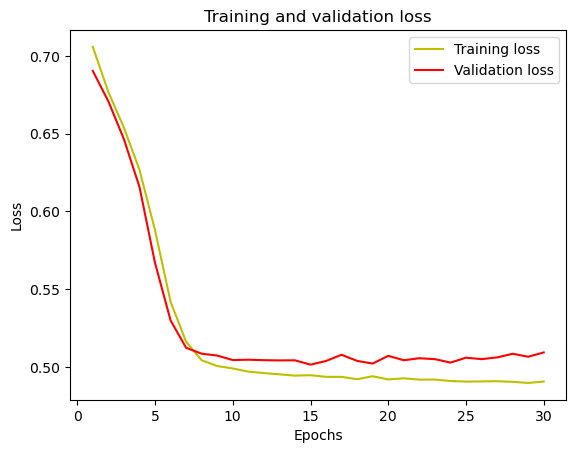

In [26]:
loss =pca2_history.history['loss']
val_loss =pca2_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

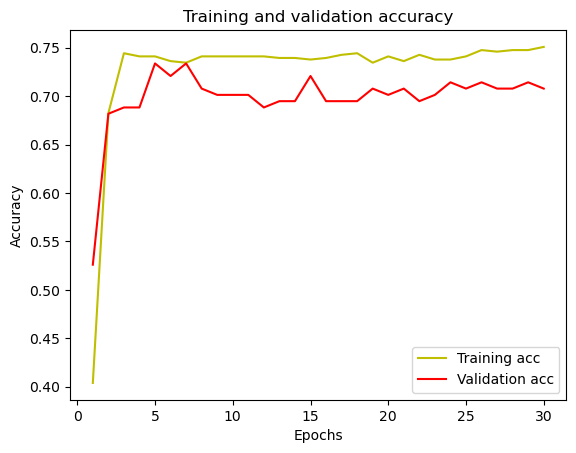

In [27]:
acc =pca2_history.history['accuracy']
val_acc =pca2_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

주성분 분석 결과 (PC1, PC2,PC3):
 [[-2.15293473 -0.69194787 -0.49354072]
 [ 0.35151129  2.11066037 -1.77735476]
 [-0.79702676  0.62574943 -0.76785544]
 [ 1.29285456  1.96366732  0.14746636]
 [ 0.75853439 -1.96671088  0.80291896]]


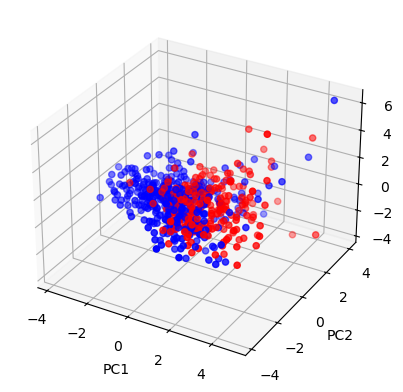

(614, 3)


In [28]:
from mpl_toolkits.mplot3d import Axes3D

# 2. PCA 적용 (train 데이터로만 fit, 주성분 3개)
pca = PCA(n_components=3)
train_input_pca = pca.fit_transform(train_input_scaled)

# 3. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)

print("주성분 분석 결과 (PC1, PC2,PC3):\n", train_input_pca[:5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_input_pca[:,0],train_input_pca[:,1],train_input_pca[:,2],c=train_target,cmap='bwr')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

print(train_input_pca.shape)

In [29]:
pca3_model = model_fn((3,))
pca3_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
pca3_model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
pca3_history = pca3_model.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.6195 - val_accuracy: 0.6948 - val_loss: 0.5596
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7129 - loss: 0.5413 - val_accuracy: 0.7792 - val_loss: 0.5155
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7475 - loss: 0.5055 - val_accuracy: 0.7468 - val_loss: 0.4983
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.4882 - val_accuracy: 0.7403 - val_loss: 0.4919
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7755 - loss: 0.4780 - val_accuracy: 0.7403 - val_loss: 0.4918
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7699 - loss: 0.4619 - val_accuracy: 0.7273 - val_loss: 0.4917
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.7770 - loss: 0.4630 - val_accuracy: 0.7273 - val_loss: 0.4931
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7687 - loss: 0.4701 - val_accuracy: 0.7273 - val_los

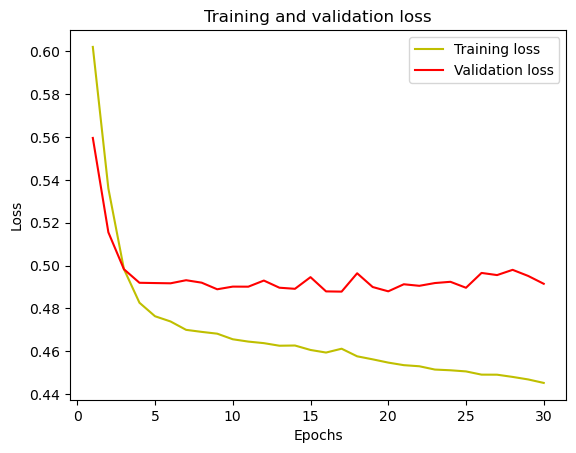

In [31]:
loss =pca3_history.history['loss']
val_loss =pca3_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

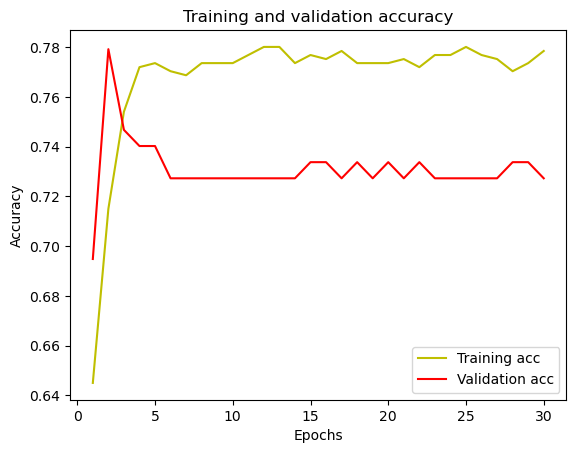

In [32]:
acc =pca3_history.history['accuracy']
val_acc =pca3_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
pca3_model.evaluate(test_input_pca,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.7667 - loss: 0.4626


[0.4914745092391968, 0.7272727489471436]

In [34]:
pca = PCA(n_components=5)
train_input_pca = pca.fit_transform(train_input_scaled)

# 2. 학습된 PCA를 test 데이터에 적용 (transform만 수행)
test_input_pca = pca.transform(test_input_scaled)

print("주성분 분석 결과 (PC1, PC2,PC3):\n", train_input_pca[:5])
print(train_input_pca.shape)

주성분 분석 결과 (PC1, PC2,PC3):
 [[-2.15293473 -0.69194787 -0.49354072  0.42442963  0.4626282 ]
 [ 0.35151129  2.11066037 -1.77735476  2.23644875 -0.58167341]
 [-0.79702676  0.62574943 -0.76785544 -0.12591301 -0.34414075]
 [ 1.29285456  1.96366732  0.14746636 -0.68726669 -1.94066054]
 [ 0.75853439 -1.96671088  0.80291896  1.70376232  0.13207826]]
(614, 5)


In [35]:
pca5_model = model_fn((5,))
pca5_model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
pca5_model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
pca5_history = pca5_model.fit(train_input_pca,train_target, epochs=30, batch_size=32,validation_data=(test_input_pca,test_target))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6355 - loss: 0.6653 - val_accuracy: 0.7013 - val_loss: 0.6173
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7592 - loss: 0.5964 - val_accuracy: 0.6883 - val_loss: 0.5561
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7481 - loss: 0.5321 - val_accuracy: 0.7338 - val_loss: 0.5186
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7073 - loss: 0.5295 - val_accuracy: 0.7468 - val_loss: 0.5020
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7408 - loss: 0.4967 - val_accuracy: 0.7727 - val_loss: 0.4930
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7828 - loss: 0.4674 - val_accuracy: 0.7662 - val_loss: 0.4882
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7600 - loss: 0.4952 - val_accuracy: 0.7597 - val_loss: 0.4888
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7654 - loss: 0.4689 - val_accuracy: 0.7597 - val_loss:

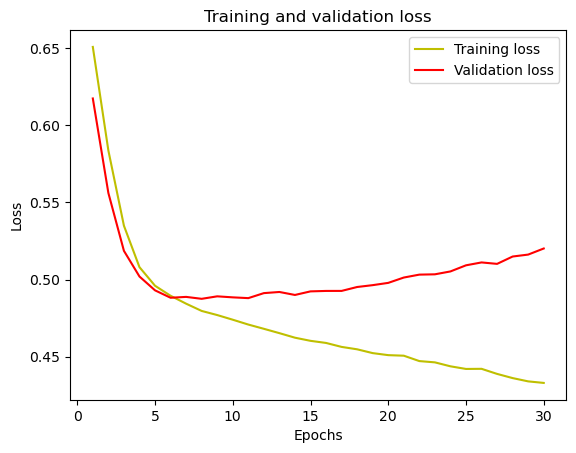

In [37]:
loss =pca5_history.history['loss']
val_loss =pca5_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

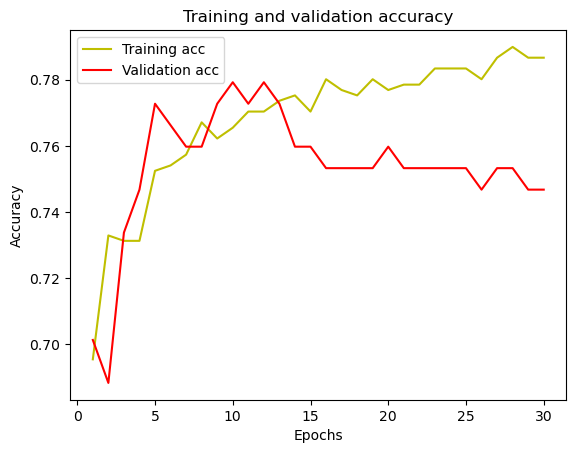

In [38]:
acc =pca5_history.history['accuracy']
val_acc =pca5_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
pca5_model.evaluate(test_input_pca,test_target)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.7858 - loss: 0.4914


[0.5201285481452942, 0.7467532753944397]